## Intro

This is our final lecture!! Crazy I know. Today's class:
1. has the main goal of creating 3 visualizations and writing a story;
2. is built on what we have done during the last two weeks. Thus, it is really important that you finish up the work from previous weeks.

Until now we have mainly focused on exploratory data analysis and visualization. In the last couple of weeks we have also built a classification method and debiased it after having discovered that its predictions were not fair. This work was loosly reproducing previous work from [ProPublica](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing). 

Today, we are going to put everything together to create a story about this case with our own analysis: 

1. First, we will get an introduction on explanatory visualizations and narratives;
2. Second, we will transform this notebook into an article, using both visualizations and descriptions to communicate your results to others.

## Part 1. Explanatory and narrative data visualization

We start with a video from Sune and then answer a few questions to make sure you've read the scientific article about types of explanatory dataviz. (*The video is from an old version of the class that used D3, so just ignore those parts. Sune will make a new one ASAP*).

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/yHKYMGwefso/0.jpg)](https://www.youtube.com/watch?v=yHKYMGwefso)

> *Exercises 1.1*: Explanatory data visualization.
* What are the three key elements to keep in mind when you design an explanatory visualization? List and explain them.
* **Answer:**
    1. Start with a question
    2. Allow exploration
    3. Know your readers
* Explain in your own words: How is explanatory data analysis different from exploratory data analysis?
* **Answer:** Explanatory focuses on explaining data and shows the reader the exact findings from the authors. It is used to showcase certain perspectives and insights of the data.

> *Exercise 1.2*: Answer a couple of questions from E. Segel and J. Heer paper [Narrative Visualization: Telling Stories with Data](http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf).
> 
> * What is the *Oxford English Dictionary's* defintion of a narrative?
> * What is your favorite visualization among the examples in section 3? Explain why in a few words.
> * Use Figure 7 to find the most common design choice within each category for the Visual narrative and Narrative structure (the categories within visual narrative are 'visual structuring', 'highlighting', etc).
> * Check out Figure 8 and section 4.3. What is your favorite genre of narrative visualization? Why? What is your least favorite genre? Why?

## Part 2. Communicate your story and results to others

#### Introduction

You have been hired by ProPublica as a freelencer to follow a case related to COMPAS (Correctional Offender Management Profiling for Alternative Sanctions), a popular commercial algorithm used by judges and parole officers for scoring criminal defendant’s likelihood of reoffending (recidivism).

You have collected the data and did some exploratory data analysis together with some modeling to understand what was going on. You have found that not only the data is biased, but also that this bias affects the performance of your classification algorithm. You know that this is a main issue and want to write an article that ProPublica will publish to inform the general public. In the article, you will explain the data bias, the algorithm prediction bias, and, because you are super thorough, you will also show how to debias the predictions of the algorithm.

---

#### Instruction to complete the article

These are the instructions to move forward:

1. First, to build a story I like to start by thinking about the key content: visualizations. What you are going to visualize will shape your story. I gave you instructions on how to build the visualizations below. We will make three visualizations: 
   * An interactive visualization to show the **bias in the data**
   * A visualization to show the **biased predictions** of your model
   * A visualization to show the **debiased results**
2. Second, we are going to convert the Notebook into an article. I drafted the structure of the article below, which you will replace with your content. These are the main parts: 
    * **A title** and **subtitles** (i.e. replace **Introduction**, **Results from exploratory data analysis**, etc. with a subtitle).
    * **An introduction**. 
    * **A description of** your findings from the **data exploration** step. 
    * **A description of** your findings from the **model predictions**.
    * **A description of** your results on **the debiasing step**.
    * **Limitations and Conclusion**.
    * **References.**

---

#### Instructions to create the visualizations

Here, you have the instructions to build your visualizations. Once you have them ready, move them to the article draft below!

**Note** Some of you where confused by the code in markdown, and Bokeh in general. Thus, I've created an [extra notebook](https://github.com/suneman/socialdata2022/blob/main/lectures/W7-8_ExtraBokeh.ipynb) with the structure of the code that create the step 1 step 2 and compute the fractions of step 3 of *Visualization 1* below. You need to fill in the code, but hopefully it will be clearer than its markdown version from Week 7. Also, you can reuse the code to complete Week 7 Ex. 1.1.

In [2]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

> *Visualization 1.* Exploratory data analysis. The interactive visualization we are going to make uses the same code you put together for Week 7 Exercise 1.1 (where we made bar plot of the number of recommited crimes across ages divided by race), with a few changes/adds on:
>
>    * First, instead of age, create an `age_group` column to use on the x-axis. The groups should be $(0,20],(20,40],(40,60],(60,80],(80,100]$. 
>    * Second, instead of using the number of recommitted crimes for each race, compute the total number of samples per age group and the total number of recommitted crimes per age group. 
>    * Third, we are going to add a `HoverTool` as in Week 7, Exercise 1.2 showing two fractions:
>        * the number of recommitted crimes of the age group over the number of samples of the age group;
>        * the number of recommitted crimes of the age group over the total recommitted crimes across age groups.
>    * The result should look similar to [this](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/W8_Viz1_sub.png).

In [4]:
#### Load the data ####
df = pd.read_csv("https://raw.githubusercontent.com/suneman/socialdata2022/main/files/recidivism_dataset_sub.csv")

#### Preprocess the data as in Week 6 Ex. 3.2 ####

#1) filter
mask = (
        (df.is_recid != -1) &
        (df.c_charge_degree != 'O') &
        ((-30 <= df.days_b_screening_arrest) & (df.days_b_screening_arrest <= 30))
)

df = df[mask].reset_index(drop=True)

#2) drop columns
df = df.drop(['is_recid', 'c_charge_degree', 'days_b_screening_arrest'], axis=1)


#### Create age_group column from column age ####
# Fraction of recidivism by age
def bin_age(row):
    age = row['age']
    if 0 < age <= 20:
        return ']0-20]'
    elif 20 < age <= 40:
        return ']20-40['
    elif 40 < age <= 60:
        return ']40-60]'
    elif 60 < age <= 80:
        return ']60-80]'
    elif 80 < age <= 100:
        return ']80-100]'


df['age_group'] = df.apply(bin_age, axis=1)

In [13]:
# Find rows where crimes were recommitted
recommit_idx = df.query('two_year_recid == 1').index

In [173]:
def count_recomitted(group):
    return len(group.filter(items=recommit_idx))


def agg_recomitted(df, group):
    #Compute number of recommitted crimes and total number of samples
    df_ = df.groupby(group).agg({group: [count_recomitted,
                                         'count']}).reset_index()

    #fix the column names by following https://stackoverflow.com/questions/14189695/reset-a-columns-multiindex-levels
    df_ = df_.transpose().reset_index(level=0, drop=True).transpose()
    df_.columns = [group, 'count_recomitted', 'count']
    #Compute fraction of recommitted in group and across groups
    df_['frac_recid'] = df_['count_recomitted'] / df_['count']
    df_['frac_tot'] = df_['count_recomitted'] / len(df.filter(items=recommit_idx, axis=0))

    return df_


df_ = agg_recomitted(df, group='age_group')

In [174]:
df_

,age_group,count_recomitted,count,frac_recid,frac_tot
0,]0-20],141,189,0.746032,0.050196
1,]20-40[,2111,4305,0.49036,0.751513
2,]40-60],516,1500,0.344,0.183695
3,]60-80],40,176,0.227273,0.01424
4,]80-100],1,2,0.5,0.000356


In [176]:
from bokeh.models import ColumnDataSource, Legend, LabelSet

# Set the tooltip hover object
tooltips = [
    ('Fraction of recommitted crimes in age', '@frac_recid'),
    ('Fraction of recommitted crimes across ages', '@frac_tot')
]


def plot_bar(df_, group):
    # Plotting
    #Convert your DataFrame to Bokeh ColumnDataSource
    src = ColumnDataSource(df_)

    #Create empty list for custom legend
    items = []

    #Create an empty figure
    p = figure(plot_width=600,
               plot_height=400,
               title=f'N. samples by {group}',
               x_axis_label=f'{group}',
               y_axis_label='N. samples',
               x_range=df_[group],
               tooltips=tooltips)

    #Define the columns to use for each bar
    bar_cols = ['count', 'count_recomitted']

    colors = ['red', 'blue']

    #Add bars by using p.var
    bar = {}
    for indx, i in enumerate(bar_cols):
        bar[i] = p.vbar(x=group, top=i, source=src, width=0.5,
                        color=colors[indx], muted=False)

        #Append items to create the legend
        items.append((bar_cols[indx], [bar[i]]))

    #This is to manage the legend in plot
    p.legend.visible = True

    #add the legend outside the plot
    legend = Legend(items=items, location='top')
    p.add_layout(legend, 'left')
    p.legend.click_policy = "mute"  #you can also try "hide"

    return p


p = plot_bar(df_, group='age_group')

output_notebook()

show(p)

Loading BokehJS ...


>    * Now that you have the code for this plot, create other two plots in the same way but by using `sex` and `race`.
>    * Finally, combine the three plots into one unique visualization with `Tabs` and `Panel`. To have an hint on how to do it, have a look at [this solution](https://stackoverflow.com/questions/38169164/adding-layout-to-tabs-on-bokeh-dashboard)
>    * You just created your first visualization for the article! You can personalize it as you like, but it should look somewhat like the one in the following video:

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/eJZGQiA7CKo/0.jpg)](https://www.youtube.com/watch?v=eJZGQiA7CKo)

In [177]:
from bokeh.layouts import layout
from bokeh.models.widgets import Panel

# Create age group plot
df_ = agg_recomitted(df, group='age_group')
p_age = plot_bar(df_, group='age_group')

# Create sex plot
df_ = agg_recomitted(df, group='sex')
p_sex = plot_bar(df_, group='sex')

# Create race plot
df_ = agg_recomitted(df, group='race')
p_race = plot_bar(df_, group='race')

# Create layout with 2 rows with two figures in the first row and one in the second
l1 = layout([[p_age, p_sex], [p_race]], sizing_mode='stretch_width')

tab1 = Panel(child=l1, title="This is Tab 1")

output_notebook()
show(l1)

Loading BokehJS ...

> *Visualization 2.* Classification results. This visualization will show the results of your classification model and how they are biased. This is just a different way of visualizing the results from Week 7, Exercise 2. Please, use the model you have trained/tested in Week 6 by using only the columns selected in Week 6, Exercise 3.1 and by preprocessing as in Exercise 3.2. We will make a plot containing three subplots:
>

In [168]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Ignore deprecation warnings
import warnings

warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier

In [169]:
columns = ['age', 'sex', 'race', 'juv_fel_count', 'juv_misd_count', 'priors_count']
target = ['two_year_recid']


def build_data(df):
    df_model = df.copy()
    categorical_features = ['sex', 'race']
    encoder = LabelEncoder()

    for col in categorical_features:
        df_model[col] = encoder.fit_transform(df_model[col])

    return df_model, encoder


df_model, encoder = build_data(df)

X_train, X_test, y_train, y_test = train_test_split(df_model[columns], df_model[target], test_size=0.3)

model = RandomForestClassifier(n_estimators=100)
model = model.fit(X=X_train, y=y_train)

>   1. The first subplot shows the feature importances from the model.
>      * **If you used a Decision Tree**, use [`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to get the values and plot them as a [horizontal lollipop plot](https://python-graph-gallery.com/182-vertical-lollipop-plot).
>      * **If you used a Random Forest** you can also have the standard deviation for each feature importance by following [these steps](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html). Plot the feature importances and standard deviations by using [`plt.errorbar()`](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.errorbar.html).

In [182]:
import numpy as np
import matplotlib.pyplot as plt

In [343]:
# Make a pandas Series object with column mappings
forest_importances = pd.Series(model.feature_importances_, index=columns)

# Get tree standard deviations
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

[Text(0.5, 1.0, 'Random forest feature importance'),
 Text(0, 0.5, 'Feature'),
 Text(0.5, 0, 'Importance')]

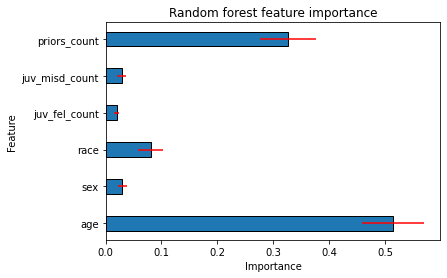

In [347]:
fig, ax_1 = plt.subplots()

forest_importances.plot.barh(xerr=std, ax=ax_1, width=0.4, ecolor='red', edgecolor='black')
ax_1.set(
    title="Random forest feature importance",
    ylabel="Feature",
    xlabel='Importance'
)

>   2. The second subplot shows the confusion matrix for the entire model (as in Week 7 Ex. 2).
>      * **N.B.** Please, use the `confusion_matrix()` function from `sklearn.metrics` and **make sure you add the parameter** `normalize="true"` which normalizes the rows of the confusion matrix and will help the comparison in the third subplot.
>      * **Hint.** [Here](https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels) and hint on how to plot it.

[Text(0.5, 1.0, 'Confusion Matrix')]

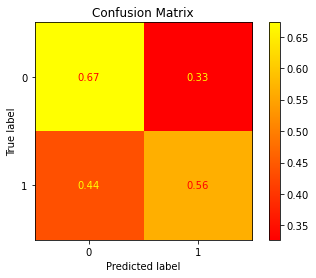

In [355]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

fig, ax_2 = plt.subplots()
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=model.predict(X_test), cmap='autumn', normalize='true',
                                        ax=ax_2)
ax_2.set(
    title='Confusion Matrix'
)

3. The third subplot shows the difference between the values of the confusion matrices of the two populations we are interested in, i.e. African-Americans and Caucasian, and the confusion matrix of your model:
> $$D_{aa} = CM_{aa} - CM_{tot};$$
> $$D_{ca} = CM_{ca} - CM_{tot};$$
> where $CM_{aa}$, $CM_{ca}$, and $CM_{tot}$ are the confusion matrices for African-Americans, Caucasians, and the total one from the model respectively. **N.B.** You do not have to retrain the model to get $CM_{aa}$ and $CM_{ca}$.
>      * Display the values for the difference in TP, TN, FP, and FN in an [horizontal bar plot](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html), where you have the difference on the x-axis, and the TP, TN, FP and FN labels on the y-axis. You can transform the difference in percentage if you wish.
>

In [349]:
# Get LabelEncoder mapping
dict(zip(df.race.unique(), encoder.transform(df.race.unique())))

{'Other': 5,
 'African-American': 0,
 'Caucasian': 2,
 'Hispanic': 3,
 'Asian': 1,
 'Native American': 4}

In [350]:
# Get indicies of rows with Caucasian race
cauc_idx = X_test.query('race == 2').index

X_test_cauc = X_test.filter(items=cauc_idx, axis=0)
y_test_cauc = y_test.filter(items=cauc_idx, axis=0)

# Get indicies of rows with African-American race
afro_idx = X_test.query('race == 0').index

X_test_afro = X_test.filter(items=afro_idx, axis=0)
y_test_afro = y_test.filter(items=afro_idx, axis=0)

In [351]:
# Get the confusion matricies
CM_aa = confusion_matrix(y_test_afro, model.predict(X_test_afro), normalize='true')
CM_ca = confusion_matrix(y_test_cauc, model.predict(X_test_cauc), normalize='true')
CM_tot = confusion_matrix(y_test, model.predict(X_test), normalize='true')

# Calculate the element-wise percentage difference
D_aa = (CM_aa - CM_tot) / ((CM_aa + CM_tot) / 2) * 100
D_ca = (CM_ca - CM_tot) / ((CM_ca + CM_tot) / 2) * 100

In [352]:
# Extract results into dataframe
df_D = pd.DataFrame(np.vstack([D_aa.ravel(), D_ca.ravel()]), columns=['TN', 'FP', 'FN', 'TP'],
                    index=['African-American', 'Caucasian'])
df_D

,TN,FP,FN,TP
African-American,-6.382867,11.966577,-10.129635,7.190242
Caucasian,1.951500,-4.139197,15.240887,-13.632640


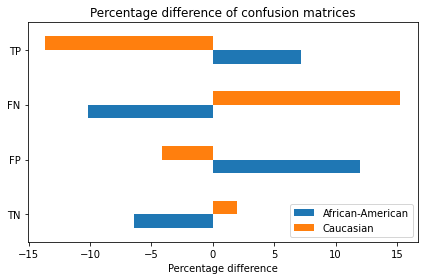

In [374]:
fig, ax_3 = plt.subplots()
df_D.T.plot.barh(sharey=True, ax=ax_3)

ax_3.set(
    title='Percentage difference of confusion matrices',
    xlabel='Percentage difference',
)

plt.tight_layout()
plt.show()

4. Finally, customize the plot as you like: choose colors, add labels, titles, legends, captions etc. [Here](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/W8_Viz2_custom.png) and [here](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/W8_Viz2_lollipop.png) you can have a look at how I made them, but it is just for inspiration do not make it exactly the same...make it yours! make it better! 😊

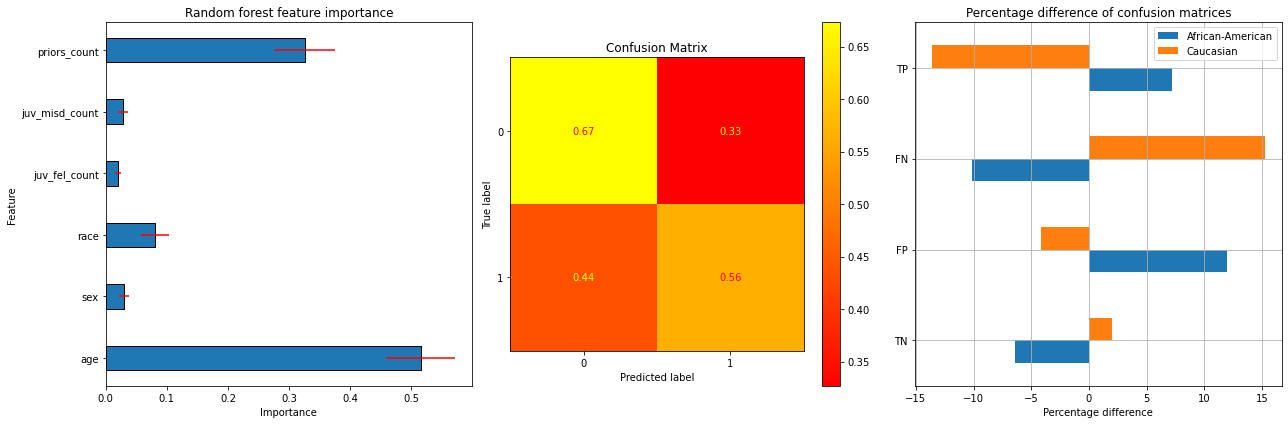

In [379]:
# Collect plots into final cell
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1
forest_importances.plot.barh(xerr=std, ax=axs[0], width=0.4, ecolor='red', edgecolor='black')
axs[0].set(
    title="Random forest feature importance",
    ylabel="Feature",
    xlabel='Importance'
)

# Plot 2
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=model.predict(X_test), cmap='autumn', normalize='true',
                                        ax=axs[1])
axs[1].set(
    title='Confusion Matrix'
)

# Plot 3
df_D.T.plot.barh(ax=axs[2])

axs[2].set(
    title='Percentage difference of confusion matrices',
    xlabel='Percentage difference'
)
axs[2].grid(True)

plt.tight_layout()
plt.show()

> *Visualization 3.* Debiasing results. The plot you are going to make shows the results from the debiasing method. Here, you will use the *Equal Odds* method and the results from Week 7, Ex. 3.3. The plot consists of two subplots:
>   1. The first subplot shows the AUC-ROC curve and highlights the threshold found for the model. It is the same visualization of Week 7, Ex. 3.3 but by using matplotlib, seaborn, etc. instead of Bokeh. In my version of the plot below, two things are missing (I want you to chose the points on the curve 😇) so **make sure to add them**:
>      * Mark the points you chose on the curves, you can for instance highlight them with a different color or symbol, or you can use a [circle](https://stackoverflow.com/questions/9215658/plot-a-circle-with-pyplot) or point at them with [arrows](https://stackoverflow.com/questions/53538909/arrow-in-plot-matplotlib-pyplot)... it's up to you.
>      * Add a text on the figure that display the thresholds chosen. You can add texts on matplotlib figures `plt.figtext()`.
>

In [630]:
from sklearn.metrics import confusion_matrix
import numpy as np


# First we define functions
def get_y_hat(y_prob, th):
    """
    :param y_prob: Model probabilities
    :param th: a threshold between 0 and 1
    :return: Equal odds transformed probabilities
    """
    return [1 if x > th else 0 for x in y_prob[:, 1]]


def get_tpr_fpr(y_hat, y_true):
    """
    :param y_hat: Target scores
    :param y_true: True targets
    :return: true positive rate and false positive rate
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_hat).ravel()

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return tpr, fpr


#This function takes as an input y, y_probs, thr
#and returns the points to plot the ROC curve and their threshold
def roc_curve(y, y_probs, ths):
    #initialize roc as an empty np.array
    roc = np.array([])
    #loop over thresholds
    for th in ths:
        #convert y_prob in y_hat
        y_hat = get_y_hat(y_probs, th)
        #compute TPR and FPR
        TPR, FPR = get_tpr_fpr(y_hat, y)
        #add threshold and point to roc array
        roc = np.append(roc, [th, FPR, TPR])

    #return roc
    return roc.reshape(-1, 3)

In [631]:
# Define the threshold
ths = np.linspace(1e-10, 1 - 1e-10, 20)

# Get the roc curves
roc_ca = roc_curve(y_test_cauc, model.predict_proba(X_test_cauc), ths)
roc_aa = roc_curve(y_test_afro, model.predict_proba(X_test_afro), ths)

# Structure plotting data in a dataframe
df_plot = pd.DataFrame(np.hstack([roc_aa, roc_ca[:, 1:]]), columns=['th', 'FPR_AA', 'TPR_AA', 'FPR_CA', 'TPR_CA'])

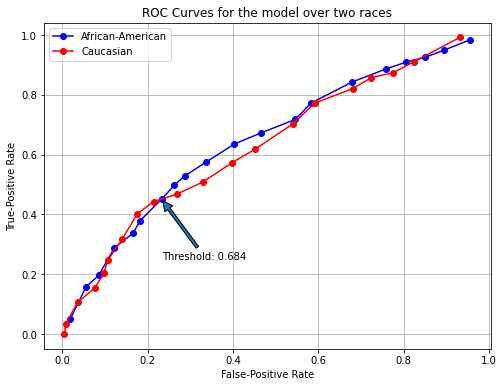

In [632]:
fig, axs = plt.subplots(figsize=(8, 6))

# Set options that are used for both plots
common_options = {
    'ax': axs,
    'style': 'o-'
}

# Plot African-American scatter + line plot
df_plot.plot(x='FPR_AA',
             y='TPR_AA',
             color='blue',
             label='African-American',
             **common_options)

# Plot Caucasian scatter + line plot
df_plot.plot(x='FPR_CA',
             y='TPR_CA',
             color='red',
             label='Caucasian',
             **common_options)

# Set labels
axs.set(
    title='ROC Curves for the model over two races',
    xlabel='False-Positive Rate',
    ylabel='True-Positive Rate'
)

# Create arrow to threshold
row = df_plot.iloc[13, :]

axs.annotate(f'Threshold: {row["th"]:.3f}', xy=(row['FPR_AA'], row['TPR_AA']),
             xytext=(row['FPR_AA'], row['TPR_AA'] - 0.2),
             arrowprops=dict(
                 arrowstyle='simple,tail_width=0.3,head_width=1,head_length=1')
             )

axs.grid(True)

plt.legend()
plt.show()

2. The second subplot shows the True-Positive and False-Positive rates for African-Americans and Caucasian before and after the debiasing method. You can do this with a bar plot of course, however I was a bit bored of bar plots and decided that we will use a [slope chart](https://towardsdatascience.com/slope-charts-why-how-11c2a0bc28be#:~:text=Slope%20charts%20are%20simple%20graphs,in%20the%20analyzed%20time%20interval.) instead.
> * The slope chart will have 4 lines: TPR for African-Americans, TPR for Caucasian, FPR for African-Americans, and FPR for Caucasian.
> Each line has two points, i.e. the value of the rate before and after debiasing.
> [Here](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/W8_Viz3_custom.png), you can find my version of the plot. Again, customize it as you like, make it yours! make it better! 😊
>      * **Hint** You can have a look at this [website](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#18.-Slope-Chart)
> for inspiration, it also include many other visualization types so check it out for your project!

In [633]:
# Get the roc curves
roc_ca = roc_curve(y_test_cauc, model.predict_proba(X_test_cauc), [0.684])
roc_aa = roc_curve(y_test_afro, model.predict_proba(X_test_afro), [0.684])

def roc_curve_no_th(y_test, y_hat):
    roc = np.array([])
    #compute TPR and FPR
    TPR, FPR = get_tpr_fpr(y_hat, y_test)
    roc = np.append(roc, [FPR, TPR])
    #return roc
    return roc.reshape(-1, 2)


roc_ca_before = roc_curve_no_th(y_test_cauc, model.predict(X_test_cauc))
roc_aa_before = roc_curve_no_th(y_test_afro, model.predict(X_test_afro))

# Structure plotting data in a dataframe
df_plot = pd.DataFrame(
                data=np.vstack([
                        np.hstack([roc_aa_before, roc_ca_before]),
                        np.hstack([roc_aa[:, 1:], roc_ca[:, 1:]])
                    ]),
                columns=['FPR_AA', 'TPR_AA', 'FPR_CA', 'TPR_CA'],
                index=['Before', 'After']).T
df_plot

,Before,After
FPR_AA,0.368664,0.232719
TPR_AA,0.605882,0.450980
FPR_CA,0.313776,0.140306
TPR_CA,0.491870,0.317073


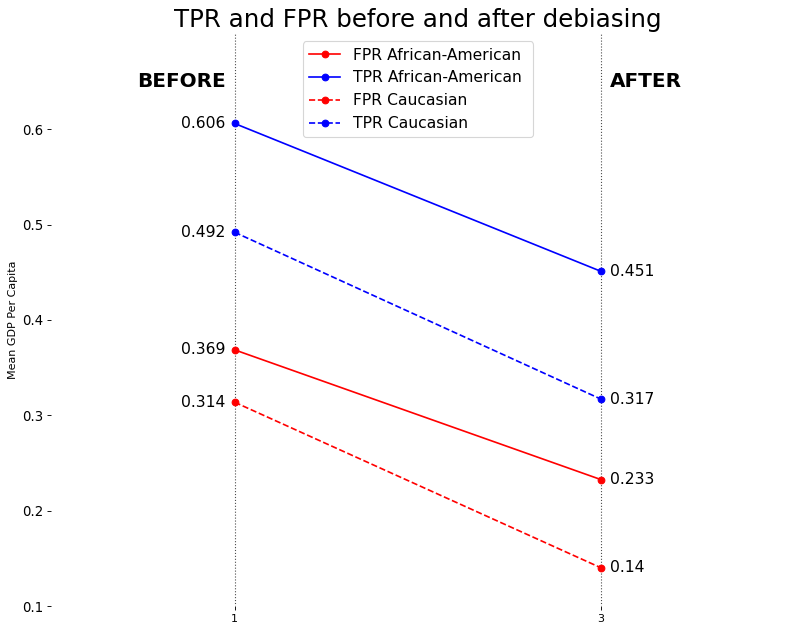

In [634]:
import matplotlib.lines as mlines

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black', kwargs={}):
    ax = plt.gca()
    l = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]], marker='o',
                      markersize=6, **kwargs)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=80)

# Vertical Lines
ax.vlines(x=1, ymin=0, ymax=1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df_plot['Before'], x=np.repeat(1, df_plot.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df_plot['After'], x=np.repeat(3, df_plot.shape[0]), s=10, color='black', alpha=0.7)

# Color map
color_map = {
    'FPR_AA': 'red',
    'FPR_CA': 'red',
    'TPR_AA': 'blue',
    'TPR_CA': 'blue',
}

line_map = {
    'FPR_AA': '-',
    'FPR_CA': '--',
    'TPR_AA': '-',
    'TPR_CA': '--',
}

column_map = {
    'FPR_AA': 'FPR African-American',
    'FPR_CA': 'FPR Caucasian',
    'TPR_AA': 'TPR African-American ',
    'TPR_CA': 'TPR Caucasian',
}

# Line Segmentsand Annotation
for idx, row in df_plot.iterrows():
    p1 = row[0]
    p2 = row[1]

    newline([1, p1], [3, p2], kwargs={
        'color': color_map[idx],
        'label': column_map[idx],
        'linestyle': line_map[idx]
    })
    ax.text(1 - 0.05, p1, str(round(p1, 3)), horizontalalignment='right', verticalalignment='center',
            fontdict={'size': 14})
    ax.text(3 + 0.05, p2, str(round(p2, 3)), horizontalalignment='left', verticalalignment='center',
            fontdict={'size': 14})

# 'Before' and 'After' Annotations
ax.text(1 - 0.05, .65, 'BEFORE', horizontalalignment='right', verticalalignment='center',
        fontdict={'size': 18, 'weight': 700})
ax.text(3 + 0.05, .65, 'AFTER', horizontalalignment='left', verticalalignment='center',
        fontdict={'size': 18, 'weight': 700})

# Decoration
ax.set_title("TPR and FPR before and after debiasing", fontdict={'size': 22})
ax.set(xlim=(0, 4), ylim=(0.1, .7), ylabel='Mean GDP Per Capita')
ax.set_xticks([1, 3])
# ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(0.1, .7, 0.1), fontsize=12)

ax.legend(loc=9, prop={'size': 14})

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.tight_layout()
plt.show()

**Note** You can add anything you like (highlighting areas, adding text etc.) to the visualizations to make them more explanatory! 

Now that you have the visualizations, move them in the structure of the article below and write the article. You should include your code, but if you want to hide the input cells to make your notebook look like an article you can do it by installing an [nbextension](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html)!

# ADD YOUR TITLE HERE

**Introduction.** Write your introduction here. Think about the audience. This is an article for the general public, so you should try to make it engaging, relatable, not too technical etc.

In [ ]:
#First viz here

**Results from exploratory data analysis.** Write this section here. The aim is to show that the data is biased, which might have an impact on the model. Relate this part to the first visualization.

In [ ]:
#Second viz here

**Results from the classification task.** Write this section here. The aim is to show that the model is biased as it is learning from biased data. Relate this part to the second visualization.

In [ ]:
#third viz here

**Results from debiasing method.** Write this section here. The aim is to show that there are methods that can help to enhance fairness in cases as this one. Relate this part to the third visualization.

**Limitations and conclusions.** Write this part here. These are your main take aways, the end of your story, where you should also highlight possible implications/limitations of what you presented.

**References.** Any article need good sources! Whenever you make a statement, refer to data sources, previous studies, methods, etc. add a reference. 

1. reference 1
2. reference 2
3. reference 3
4. etc.

You made it! This was the last lecture for this class! 

Before you go, please:
1. <mark> take a minute of your time (it is really one minute) to fill this [form](https://forms.gle/4efUQXZbjHdCaSsP8). </mark>
2. <mark> help us understand what were the pros/cons of this class by filling the second [Questionnaire](https://forms.gle/25YyJZJuBJgzXGUe8) of the course!

Thank you so much! 